Crop-Recommendation

Imports li


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the crop Dataset
df = pd.read_csv(r'data\Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2883,92.0,51.0,41.8,27.400000,69.500000,6.200000,100.000000,tobacco
2884,86.9,52.0,39.7,28.100000,70.000000,6.000000,72.000000,tobacco
2885,86.0,47.0,42.0,27.600000,69.400000,6.100000,75.000000,tobacco
2886,89.0,49.0,40.0,26.200000,68.600000,6.200000,90.000000,tobacco


EDA and Preprocessing

In [3]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2888 non-null   float64
 1   P            2888 non-null   float64
 2   K            2888 non-null   float64
 3   temperature  2888 non-null   float64
 4   humidity     2888 non-null   float64
 5   ph           2888 non-null   float64
 6   rainfall     2888 non-null   float64
 7   label        2888 non-null   object 
dtypes: float64(7), object(1)
memory usage: 180.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2888.0,49.743006,37.360975,0.000000,21.000000,36.000000,84.000000,148.000000
P,2888.0,53.930575,29.147965,5.000000,36.000000,53.000000,67.000000,145.000000
K,2888.0,44.806129,44.905104,5.000000,20.000000,30.000000,49.000000,205.000000
temperature,2888.0,25.424667,4.959095,8.825675,22.356085,25.553469,28.445250,43.675493
humidity,2888.0,66.774491,24.253590,14.258040,52.799130,72.002304,86.451933,99.981876
ph,2888.0,6.460986,0.834123,3.504752,5.950473,6.408438,6.912644,9.935091
rainfall,2888.0,110.988445,79.046034,20.211267,64.149785,91.465534,129.395728,480.000000


In [6]:
df['label'].value_counts().to_frame()

,count
label,
rice,100
maize,100
wheat,100
cowpeas,100
groundnuts,100
peas,100
beans,100
Soyabeans,100
coffee,100


## Note:
### No null values
### Multiclass Classification
### Int and Float Datatypes
### There is no Class Imbalance

In [7]:
df[df.duplicated(subset=['N','P','K','temperature','humidity','ph','rainfall','label'],keep=False)]

,N,P,K,temperature,humidity,ph,rainfall,label
2589,101.0,51.0,55.0,23.5,72.0,6.6,410.0,wheat
2686,101.0,51.0,55.0,23.5,72.0,6.6,410.0,wheat
2875,89.0,49.0,40.0,26.2,68.6,6.2,90.0,tobacco
2876,92.0,51.0,41.0,25.5,67.8,5.9,78.0,tobacco
2886,89.0,49.0,40.0,26.2,68.6,6.2,90.0,tobacco
2887,92.0,51.0,41.0,25.5,67.8,5.9,78.0,tobacco


In [8]:
import warnings

# Suppress the FutureWarning related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

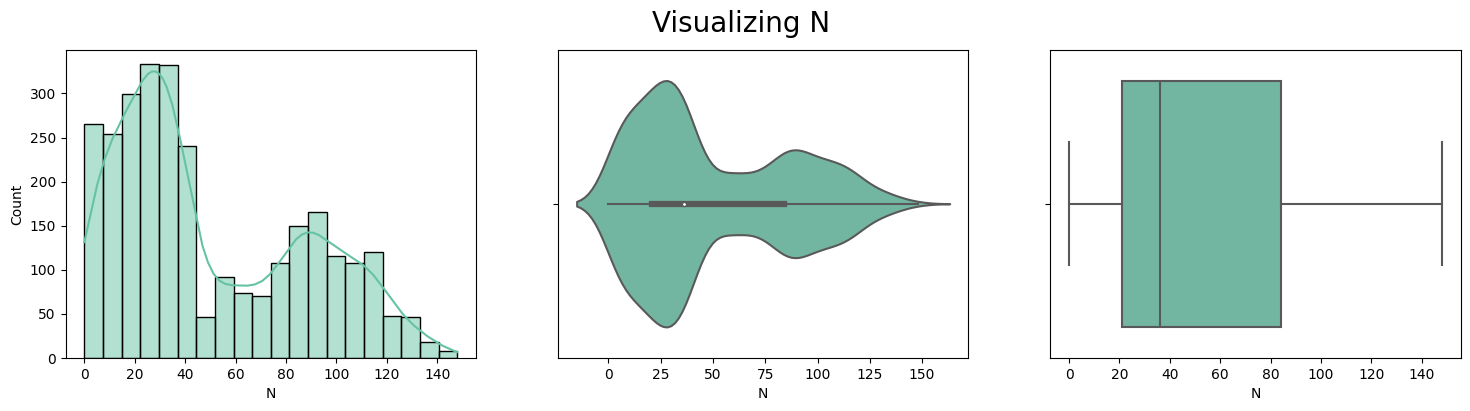

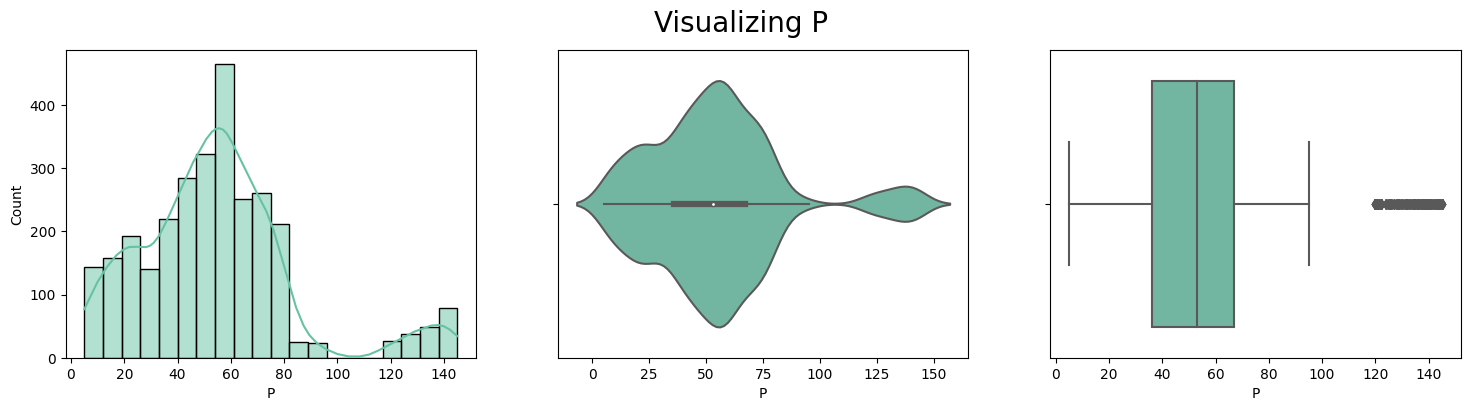

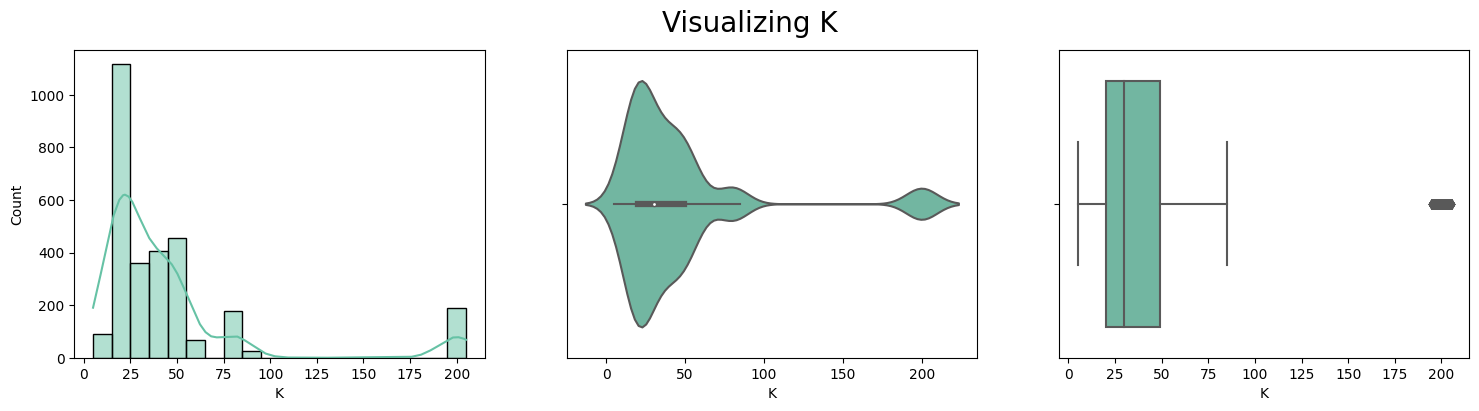

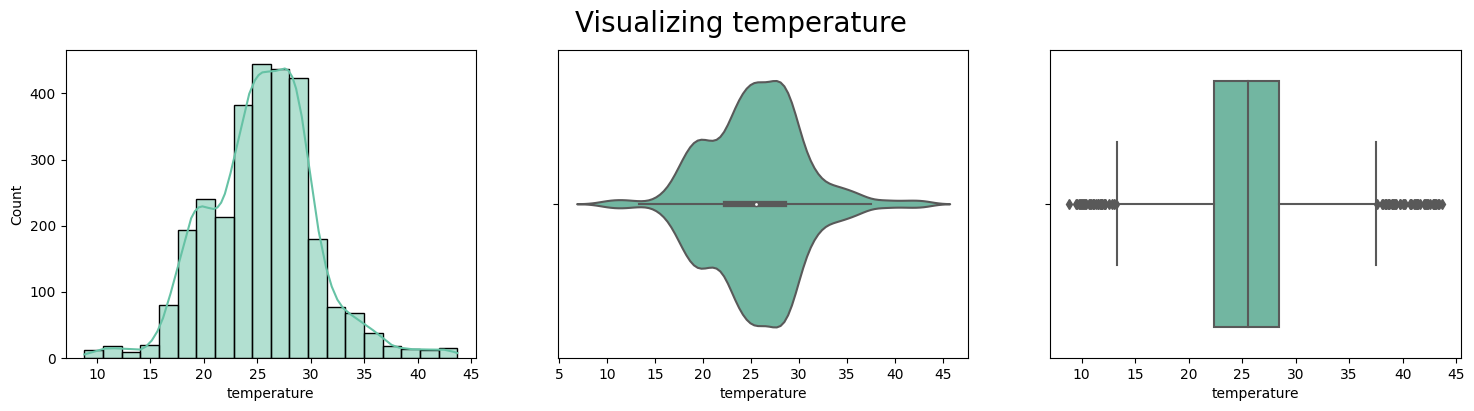

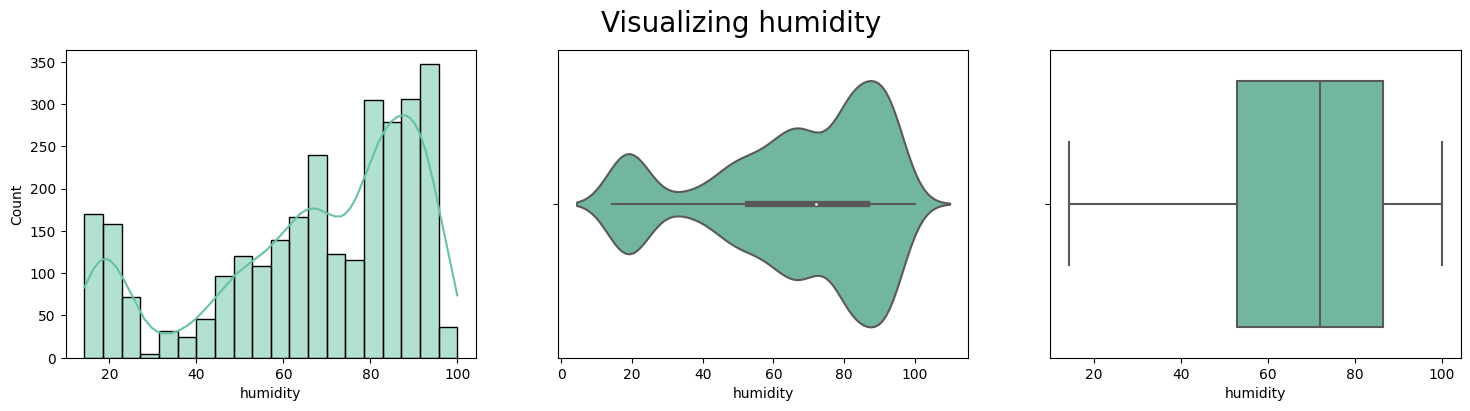

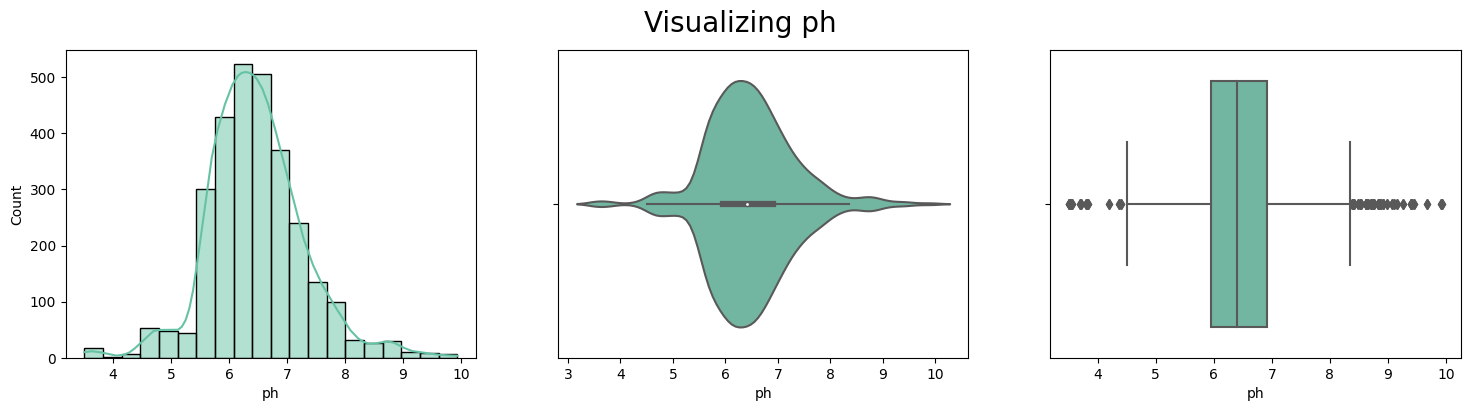

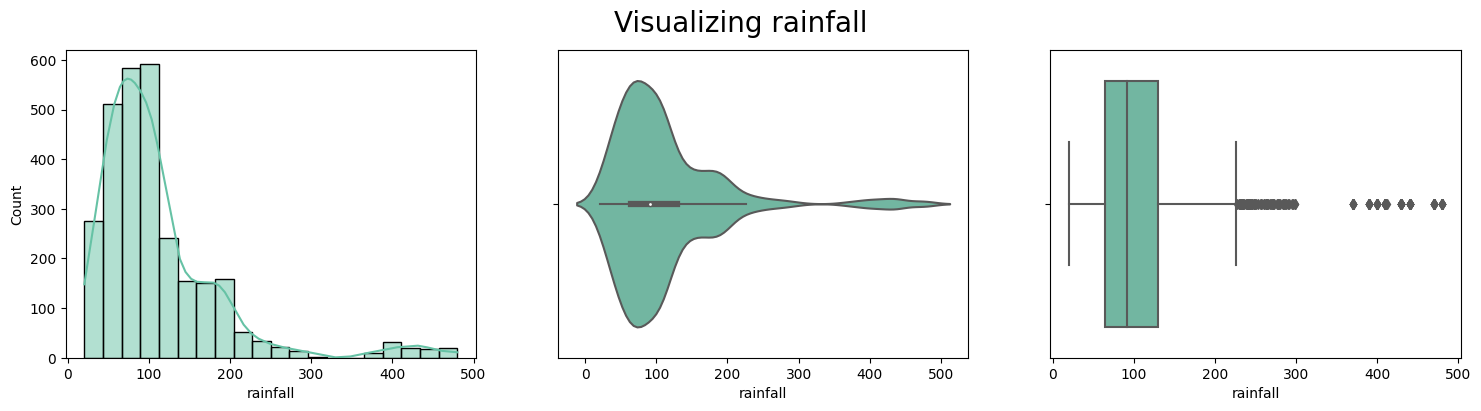

In [9]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

c:\Users\HP\anaconda3\envs\streamlit\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


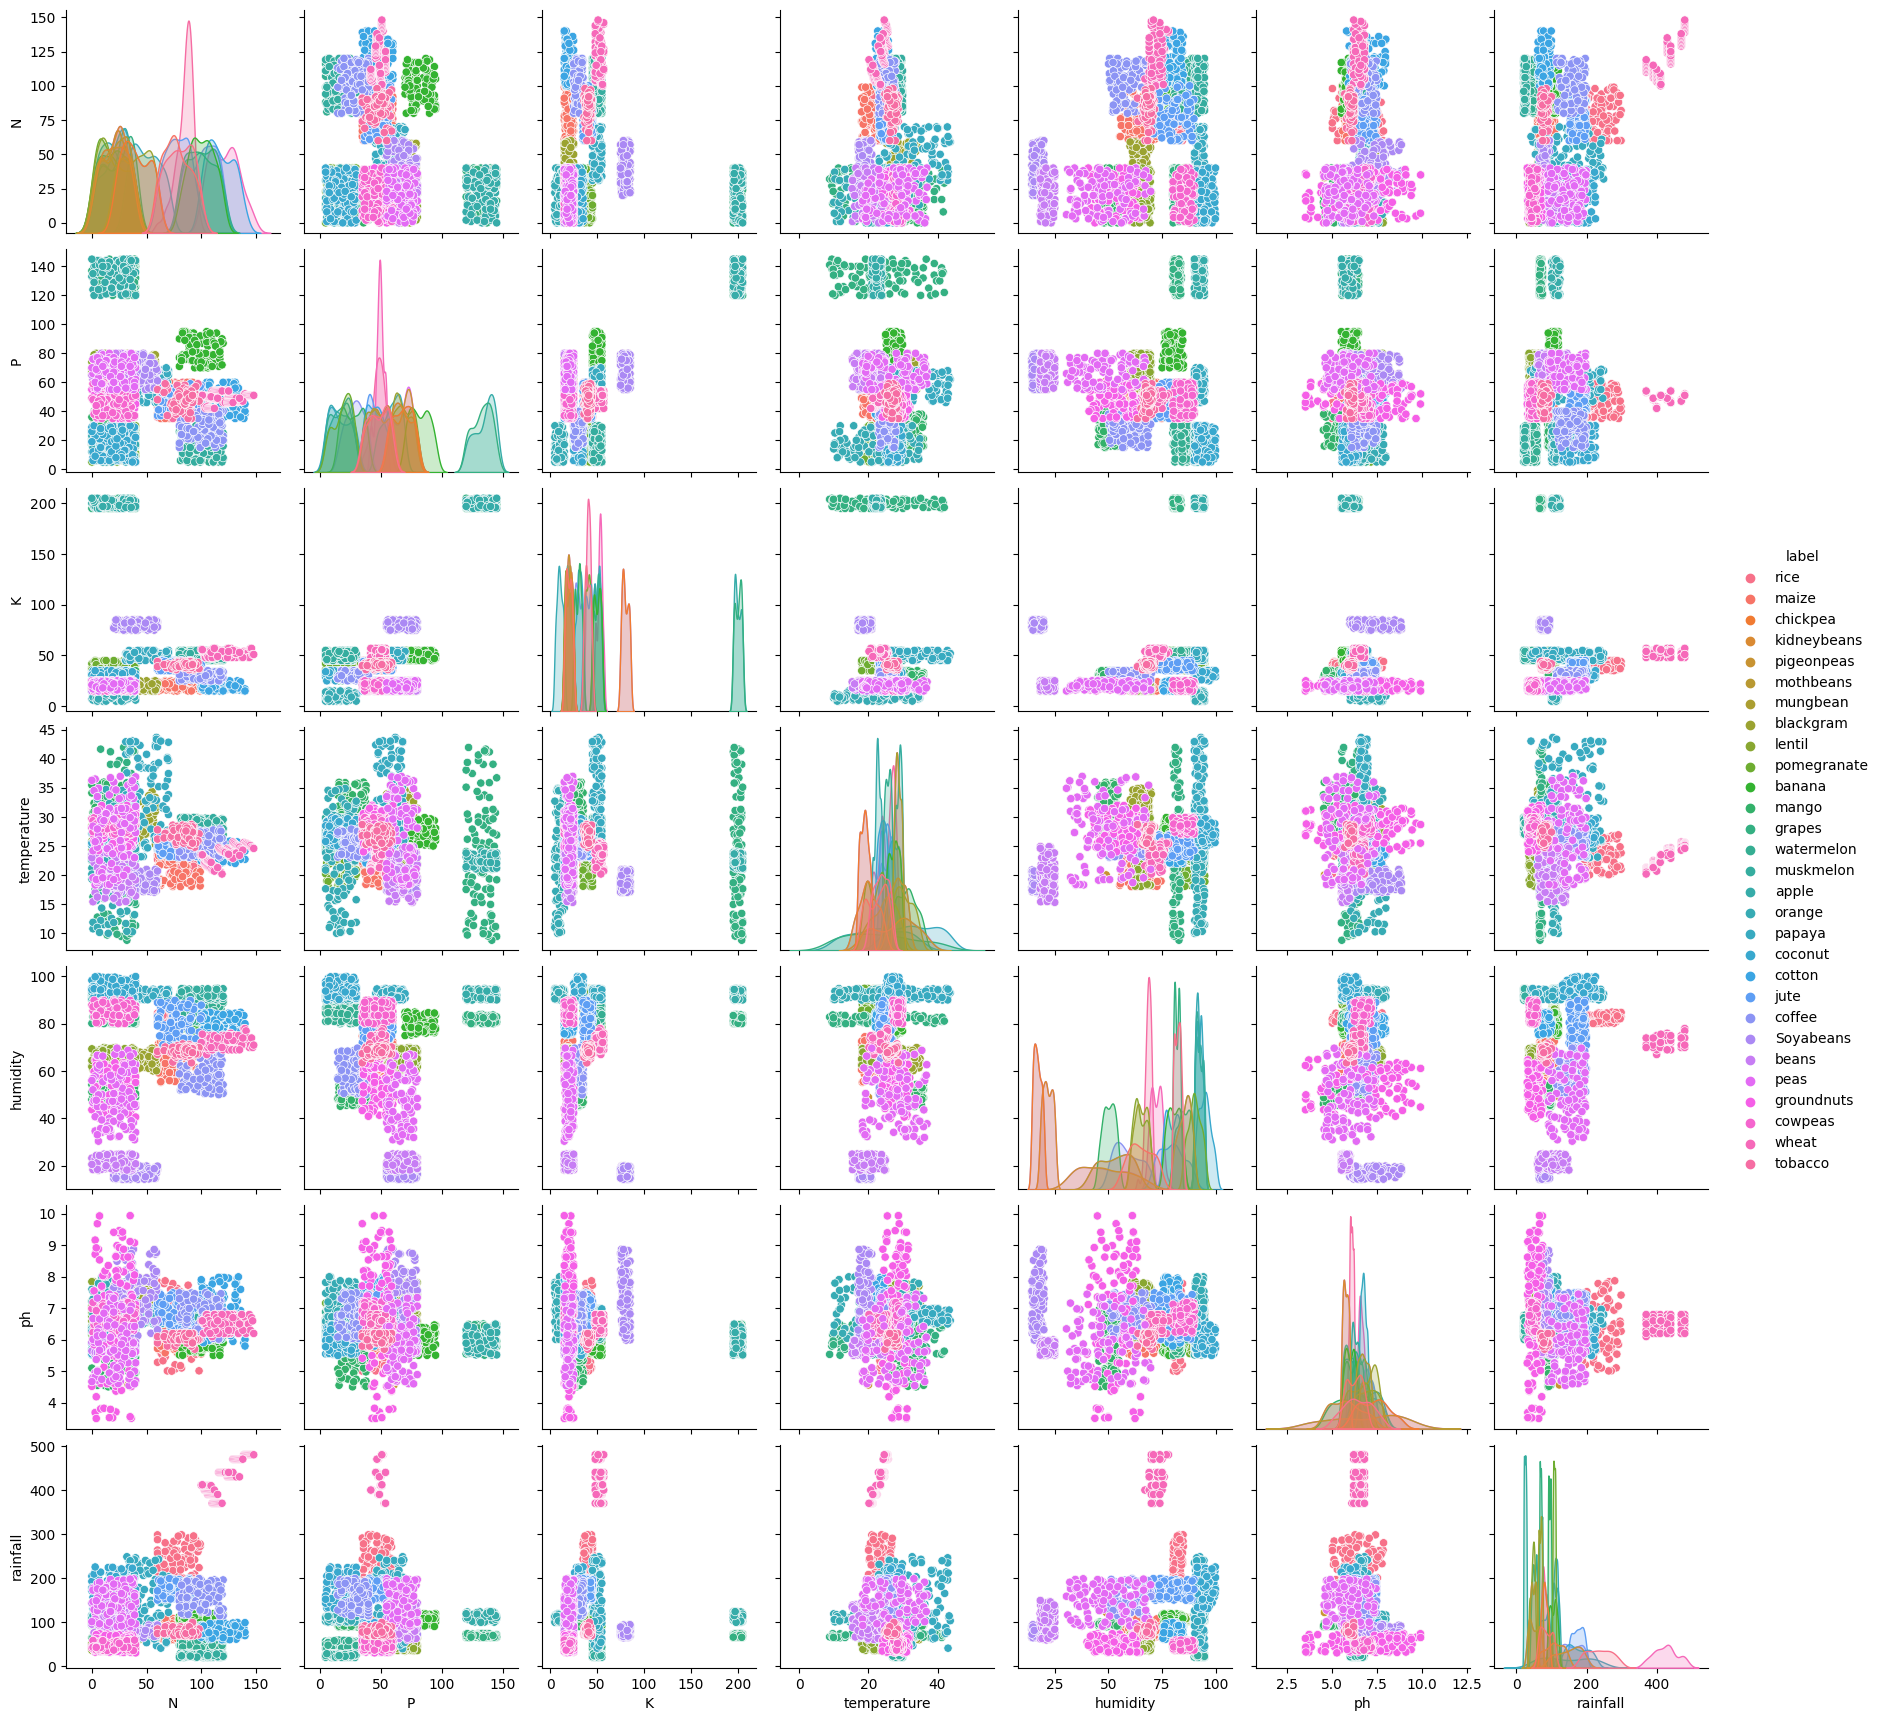

In [10]:
sns.pairplot(data=df,hue='label')
plt.show()

In [11]:
crop_names = {
    "rice": 0,
    "maize": 1,
    "jute": 2,
    "cotton": 3,
    "coconut": 4,
    "papaya": 5,
    "orange": 6,
    "apple": 7,
    "muskmelon": 8,
    "watermelon": 9,
    "grapes": 10,
    "mango": 11,
    "banana": 12,
    "pomegranate": 13,
    "lentil": 14,
    "blackgram": 15,
    "mungbean": 16,
    "mothbeans": 17,
    "pigeonpeas": 18,
    "kidneybeans": 19,
    "chickpea": 20,
    "coffee": 21,
    "peas":22,
    "cowpeas":23,
    "groundnuts":24,
    "beans":25,
    "Soyabeans":26,
    "wheat":27,
    'tobacco':28
}
print("Unique values in 'label' column before mapping:", df['label'].unique())
df['label'] = df['label'].map(crop_names)
print("Unique values in 'label' column after mapping:", df['label'].unique())

Unique values in 'label' column before mapping: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee' 'Soyabeans' 'beans' 'peas' 'groundnuts' 'cowpeas' 'wheat'
 'tobacco']
Unique values in 'label' column after mapping: [ 0  1 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2 21 26 25
 22 24 23 27 28]


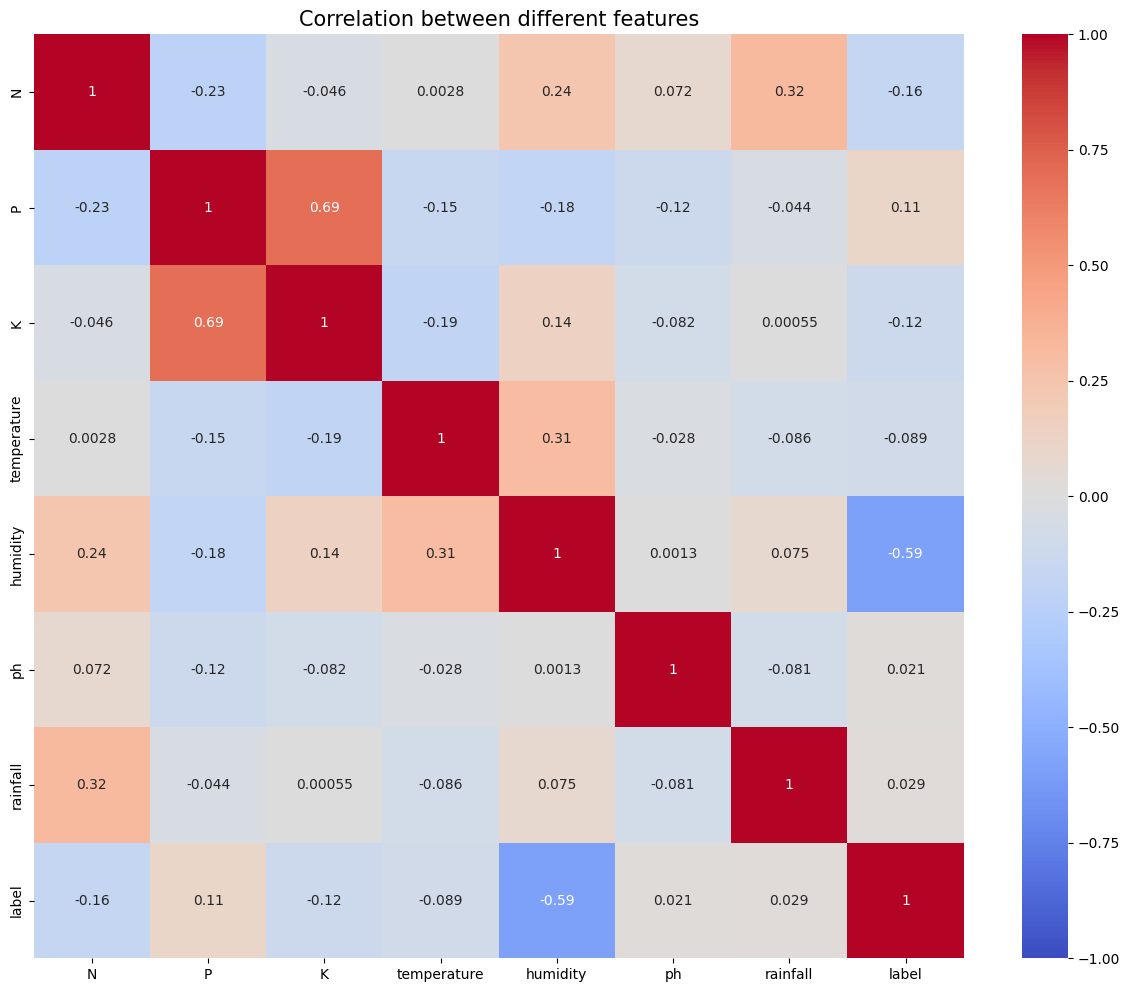

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',vmin=-1,vmax=1 )
plt.title('Correlation between different features',fontsize=15 ,c='black')
plt.show()

In [13]:
df.corr()['label'].to_frame()

,label
N,-0.164568
P,0.106412
K,-0.118941
temperature,-0.088849
humidity,-0.589655
ph,0.020883
rainfall,0.028874
label,1.000000


## Splitting the data in X and Y ( features and target)

In [14]:
y=df['label']
x=df.drop('label',axis=1)

## Train and Test Splitting

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2310, 7)
y_train: (2310,)
X_test: (578, 7)
y_test: (578,)


## Normalize features using Min-Max scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
# Function to scale user input data
def scale_user_input(user_input, scaler):
    scaled_input = scaler.transform(user_input)
    return scaled_input

In [18]:
# Save the trained MinMaxScaler
import pickle 
scaler_filename = r'scaler\scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## Import lib of Train model for deep learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)),  # Hidden layer with L2 regularization
    keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    keras.layers.Dense(len(crop_names), activation='softmax')  # Output layer with softmax activation
])

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

In [22]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights to the best achieved during training
)

In [23]:
# Train the model with EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Add EarlyStopping callback here
)

Epoch 1/150
73/73 [==============================] - 5s 21ms/step - loss: 3.3276 - accuracy: 0.1299 - val_loss: 3.0866 - val_accuracy: 0.2543
Epoch 2/150
73/73 [==============================] - 1s 9ms/step - loss: 2.7716 - accuracy: 0.2398 - val_loss: 2.3675 - val_accuracy: 0.3702
Epoch 3/150
73/73 [==============================] - 0s 6ms/step - loss: 2.1975 - accuracy: 0.3303 - val_loss: 1.8619 - val_accuracy: 0.5156
Epoch 4/150
73/73 [==============================] - 0s 5ms/step - loss: 1.8675 - accuracy: 0.3913 - val_loss: 1.5873 - val_accuracy: 0.5398
Epoch 5/150
73/73 [==============================] - 0s 5ms/step - loss: 1.6749 - accuracy: 0.4468 - val_loss: 1.3954 - val_accuracy: 0.6280
Epoch 6/150
73/73 [==============================] - 0s 5ms/step - loss: 1.5164 - accuracy: 0.4922 - val_loss: 1.2682 - val_accuracy: 0.6453
Epoch 7/150
73/73 [==============================] - 0s 4ms/step - loss: 1.3952 - accuracy: 0.5420 - val_loss: 1.1729 - val_accuracy: 0.6557
Epoch 8/150


In [24]:
# Save the model weights
model_filename = r'models\model_filename.h5'
model.save(model_filename)
model_filename = r'models\model_filename.keras'
model.save(model_filename)

c:\Users\HP\anaconda3\envs\streamlit\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


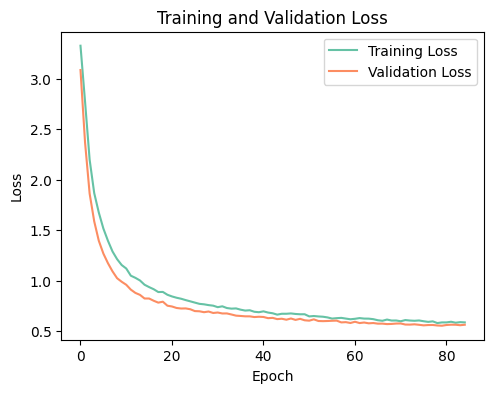

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


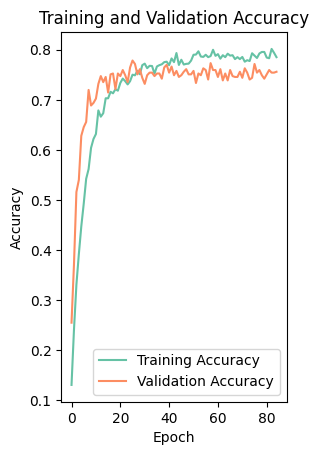

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Use y_test for true class labels
y_true = y_test

19/19 [==============================] - 0s 2ms/step


In [29]:
# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
confusion_mtx

Confusion Matrix:


array([[13,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  

In [30]:
len(confusion_mtx)

29

In [31]:
# Generate the classification report
report = classification_report(y_true, y_pred_classes)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       1.00      1.00      1.00        23
           2       0.79      0.94      0.86        16
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       1.00      0.92      0.96        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       0.93      0.93      0.93        15
          15       0.91      0.95      0.93        22
          16       0.08      0.07      0.07        15
    